In [94]:
import numpy as np 
import pandas as pd 
df = pd.read_csv("Books.csv")
df

,Book_ID,Title,Author,Genre,Sales_Amount,Customer_Rating
0,B001,The Great Gatsby,F. Scott Fitzgerald,Fiction,1500,4.5
1,B002,To Kill a Mockingbird,Harper Lee,Fiction,1200,4.8
2,B003,1984,George Orwell,Dystopian,1000,4.2
3,B004,The Hobbit,J.R.R. Tolkien,Fantasy,1800,4.6
4,B005,The Catcher in the Rye,J.D. Salinger,Fiction,900,4.0
5,B006,Brave New World,Aldous Huxley,Dystopian,1300,4.3
6,B007,The Lord of the Rings,J.R.R. Tolkien,Fantasy,2200,4.9
7,B008,The Great Expectations,Charles Dickens,Classic,950,4.1
8,B009,The Hunger Games,Suzanne Collins,Dystopian,1600,4.7
9,B010,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Fantasy,2500,4.8


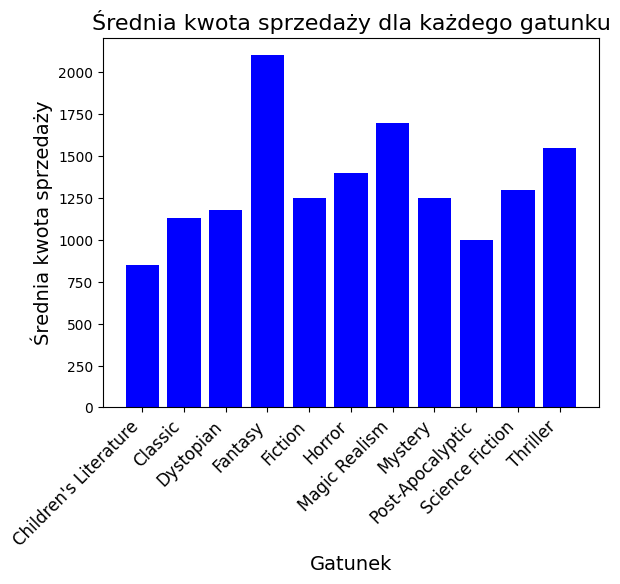

In [61]:
import matplotlib.pyplot as plt
srednia_kwota_sprzedazy_dla_kazdego_gatunku = df.groupby('Genre')['Sales_Amount'].mean() #grupujemy po gatunek i dla nich obliczamy srednia sprzedazy
plt.bar(srednia_kwota_sprzedazy_dla_kazdego_gatunku.index, srednia_kwota_sprzedazy_dla_kazdego_gatunku, color='blue', width=0.8)
plt.title('Średnia kwota sprzedaży dla każdego gatunku', fontsize=16)
plt.xlabel('Gatunek', fontsize=14)
plt.ylabel('Średnia kwota sprzedaży', fontsize=14)

# Dostosuj kąt etykiet osi x
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()


In [72]:
#Jaka jest średnia ocena klientów dla książek, których kwota sprzedaży przekracza 1500?
srednia_ocena_duza_sprzedaz = df[df["Sales_Amount"]>=1500]["Customer_Rating"].mean()
srednia_ocena_duza_sprzedaz

4.67

In [219]:
#Jaki procent książek ma ocenę klientów większą niż 4.5?
ocena_powyzej_4_5 = len(df[df["Customer_Rating"]>4.5].value_counts())
procent_ocen_4_5 = round((ocena_powyzej_4_5/len(df))*100,1)
procent_ocen_4_5

36.7

In [85]:
#Jaka jest minimalna kwota sprzedaży dla książek w gatunku "Fantasy"?
Fantasy = df[df["Genre"]=="Fantasy"]["Sales_Amount"].min()
Fantasy

1800

In [104]:
#Jaki procent książek z oceną klientów poniżej 4 ma gatunek "Dystopian"?
ponizej_4_ds = len(df[df['Customer_Rating'] < 4][df['Genre']=="Dystopian"])#[df['Sales_Amount']==900]
ponizej_4 = len(df[df['Customer_Rating'] < 4])
procent_dys_4 = round((ponizej_4_ds / ponizej_4)*100,1)
procent_dys_4

C:\Users\adria\AppData\Local\Temp\ipykernel_20540\1755855139.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ponizej_4_ds = len(df[df['Customer_Rating'] < 4][df['Genre']=="Dystopian"])#[df['Sales_Amount']==900]


50.0

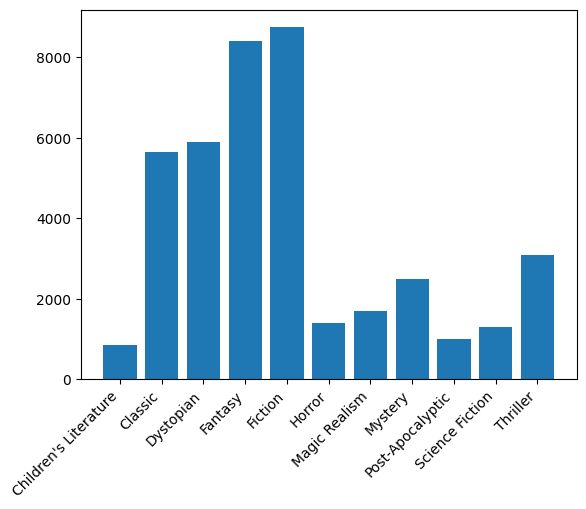

'Fiction'

In [140]:
#Zidentyfikuj najbardziej zyskowny gatunek (najwyższa całkowita kwota sprzedaży).
new_df = df.groupby('Genre')['Sales_Amount'].sum()
max_sales = new_df.idxmax()
max_sales
plt.bar(new_df.index,new_df)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.show()
max_sales

In [121]:
#Jaka jest średnia cena dla książek w gatunku "Fiction"?
srednia_znizka = df[df['Genre']=='Fiction']['Sales_Amount'].mean()
srednia_znizka

1250.0

Smallest Ratio is for: Children's Literature


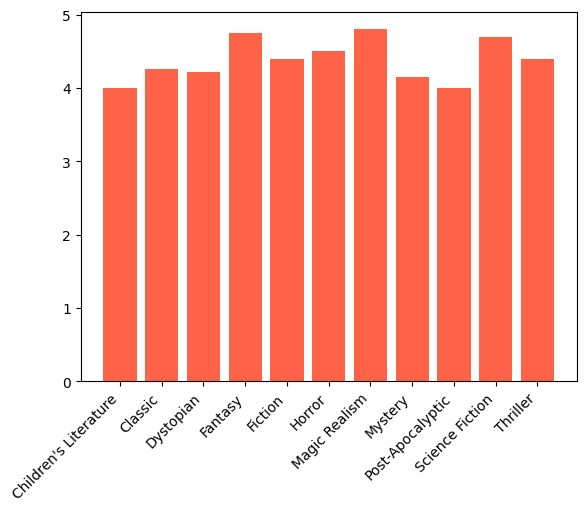

In [168]:
#Zidentyfikuj najsłabiej oceniany gatunek .
new_df = df.groupby('Genre')['Customer_Rating'].mean()
min_Ratio = new_df.idxmin()
print('Smallest Ratio is for:',min_Ratio)
plt.bar(new_df.index,new_df,  color ="tomato")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

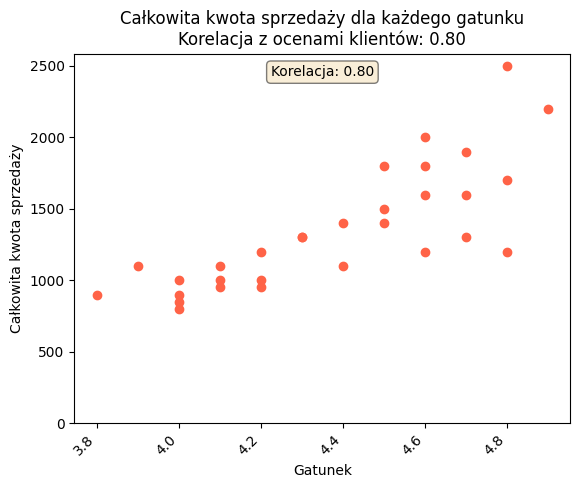

In [218]:
korelacja = df['Customer_Rating'].corr(df['Sales_Amount'])

# Wykres słupkowy
plt.scatter(df['Customer_Rating'], df['Sales_Amount'], color='tomato')

# Ustaw oś y od zera
plt.ylim(bottom=0)

# Dodaj tytuł i etykiety osi
plt.title('Całkowita kwota sprzedaży dla każdego gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Całkowita kwota sprzedaży')

# Dodaj korelację do tytułu
plt.title(f'Całkowita kwota sprzedaży dla każdego gatunku\nKorelacja z ocenami klientów: {korelacja:.2f}')

# Obróć etykiety osi x dla lepszej czytelności
plt.xticks(rotation=45, ha='right')

# Dodaj tekst z wartością korelacji do wykresu
plt.text(0.5, 0.95, f'Korelacja: {korelacja:.2f}', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Wyświetl wykres
plt.show()

In [ ]:
korelacja = df["cos"].corr(df["tam"])